## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata, study_results, on= "Mouse ID", how= "outer")

# Display the data table for preview
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_of_mice = mouse_data["Mouse ID"].unique()
len(number_of_mice)

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_data_duplicates = mouse_data.loc[mouse_data.duplicated(subset = ['Mouse ID', 'Timepoint'], keep = False), 'Mouse ID']
mouse_data_duplicates.unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse= mouse_data.loc[mouse_data["Mouse ID"] == "g989", :]
duplicated_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [46]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_clean = mouse_data[mouse_data['Mouse ID'].isin(mouse_data_duplicates)==False]
mouse_data_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count = mouse_data_clean["Mouse ID"].unique()
len(mouse_count)

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_data = mouse_data_clean.groupby(['Drug Regimen'])

tumor_mean = drug_data["Tumor Volume (mm3)"].mean()

tumor_median= drug_data["Tumor Volume (mm3)"].median()

tumor_variance = drug_data["Tumor Volume (mm3)"].var()

tumor_std = drug_data["Tumor Volume (mm3)"].std()


tumor_sem = drug_data["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
tumor_data = pd.DataFrame({"Tumor Volume Mean": tumor_mean, "Tumor Volume Median": tumor_median, 
                           "Tumor Volume Variance": tumor_variance, "Tumor Volume Standard Deviation": tumor_std, 
                           "Tumor Volume SEM": tumor_sem})
tumor_data

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumor_summary = mouse_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate(['mean', 'median', 'var', 'std', 'sem'])
tumor_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

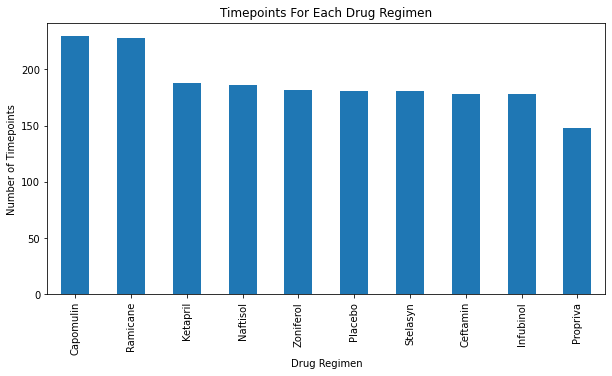

<Figure size 432x288 with 0 Axes>

In [43]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Panda
timepoints_count=mouse_data_clean.groupby(['Drug Regimen']).count()
timepoints_data=timepoints_count['Timepoint'].sort_values(ascending = False)

timepoints_data.plot(kind="bar",figsize=(10,5), ylabel ="Number of Timepoints", title ="Timepoints For Each Drug Regimen" )


plt.show()
plt.tight_layout()

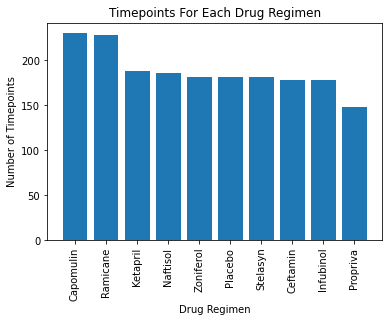

<Figure size 432x288 with 0 Axes>

In [23]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
number_of_timepoints=mouse_data_clean.groupby(mouse_data_clean["Drug Regimen"]).count()
number_of_timepoints=number_of_timepoints.sort_values("Timepoint", ascending = False)


x_values= number_of_timepoints.index
y_values= list(number_of_timepoints["Timepoint"])

x_axis= np.arange(len(x_values))
tick_locations = [value +0.4 for value in x_axis]

plt.bar(x_values, y_values, alpha=1, align="edge")
plt.title("Timepoints For Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xticks(tick_locations, rotation="vertical")

plt.show()
plt.tight_layout()

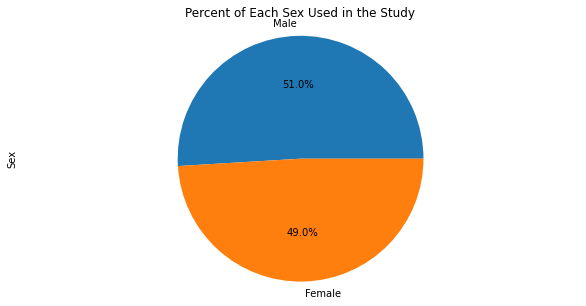

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count=mouse_data_clean.groupby(mouse_data_clean["Sex"]).count()
sex_data = sex_count["Drug Regimen"].sort_values(ascending = False)

sex_data.plot(kind = "pie", figsize =(10,5), autopct = "%1.1f%%", ylabel = "Sex", 
              title = "Percent of Each Sex Used in the Study")



plt.axis("equal")
plt.show()

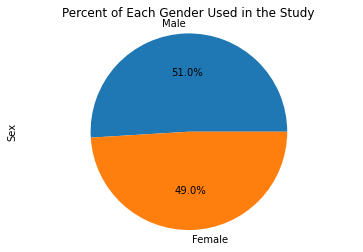

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
number_of_each_sex=mouse_data_clean.groupby(mouse_data_clean["Sex"]).count()
number_of_each_sex = number_of_each_sex["Drug Regimen"].sort_values(ascending = False)

sex = number_of_each_sex.index
sex_count = list(number_of_each_sex)

plt.pie(sex_count, labels = sex, autopct = "%1.1f%%")
plt.ylabel("Sex")
plt.title("Percent of Each Gender Used in the Study")

plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [50]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mouse_data_clean.groupby(mouse_data_clean["Mouse ID"]).max()
last_timepoint_data = last_timepoint["Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_last_timepoint= pd.merge(mouse_data_clean, last_timepoint_data, on= "Mouse ID", how= "outer")
mouse_last_timepoint_data=mouse_last_timepoint.rename(columns={"Timepoint_x": "Timepoint", "Timepoint_y":"Last Timepoint"})
mouse_last_timepoint_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [54]:
# Put treatments into a list for for loop (and later for plot labels)
drug_treatments= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in drug_treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_drug_treatment=mouse_last_timepoint_data.loc[mouse_last_timepoint_data["Drug Regimen"] == treatment, ["Mouse ID", "Drug Regimen", 
                                                                                 "Tumor Volume (mm3)", "Last Timepoint"]]
    
    # add subset 
    tumor_vol.appended[tumor_drug_treatment[Tumor]]
    
    # Determine outliers using upper and lower bounds
    

In [55]:
 tumor_drug_treatment

,Mouse ID,Drug Regimen,Tumor Volume (mm3),Last Timepoint
484,a275,Ceftamin,45.000000,45
485,a275,Ceftamin,46.795257,45
486,a275,Ceftamin,47.371343,45
487,a275,Ceftamin,49.734404,45
488,a275,Ceftamin,50.513437,45
...,...,...,...,...
1838,y865,Ceftamin,57.173538,45
1839,y865,Ceftamin,59.033275,45
1840,y865,Ceftamin,61.153140,45
1841,y865,Ceftamin,63.469549,45


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
